# **Homework 1**

Due: September 15th, 5pm (late submission until September 22nd, 5pm -- no submission possible afterwards)

25 points total (Problem 1: 8 points, Problem 2: 6 points, Coding Assignment: 11 points)

### Name: Ghirish Thaenraj

### Link to the github repo: [TODO]

## **Written Assignment**

### Introduction: Solidifying Background

The purpose of this portion is to fortify your background in probability
and statistics, linear algebra, and algorithmic analysis. The topics
explored here will be used many times throughout this course.  
  
You may be able to find answers to these problems by searching the
problem text. Please search instead for the concepts being applied; the
goal is not to solve these specific problems, but to be comfortable with
the principles that will be applied later in the course.

### **Problem 1: Bayes' Rule** (8 points)

Bayes' Rule, or Bayes' Theorem is an oft-used identity coming from
probability theory. If we have two events of interest, *A* and *B*, we
might want to ask what the probability of *B* is, given that we know *A*
happened.

$$P(B|A) = \frac{P(A|B) P(B)}{P(A)}$$

Note that this is the same as

$$P(B|A) = \frac{P(A \cap B)}{P(A)}.$$

Later in this course, the parts of this formula may be relabeled:

$$\text{Posterior} = \frac{\text{Likelihood} * \text{Prior}}{\text{Evidence}}$$

This rule will be explicitly used in Bayesian algorithms, but it is also a principle that will *implicitly* underlie almost all of our machine learning algorithms. This problem consists of four parts, each worth 2 points (1 point if the answer is correct and an additional point for showing correct work). As a hint, none of the four parts have the same answer.  

For the purposes of this question, assume that desserts have equal probability of being a cake or ice cream and uniform probability of being any of the following 7 flavors: chocolate, vanilla, strawberry, coconut, cookies & cream, fudge, and raspberry.  

1.  Suppose Steve has two desserts. What is the probability that both desserts are cakes?

2.  Suppose Paul has two desserts, the first of which is ice cream. What is the probability that both desserts are ice cream?

3.  Suppose Chace has two desserts and at least one is a cake. What is the probability that both desserts are cakes?

4.  Suppose Andrew has two desserts and at least one is chocolate flavored ice cream. What is the probability that both desserts are ice cream?


**Solution:**

1.  P(cake) = 1/2 -> P(both cakes) = (1/2)^2 = 1/4 = .25
        
2. P(both ice cream | first is ice cream) = P(second ice cream) = 1/2 = .5

3. P(both cakes | at least one cake) = P(both cakes) / P(at least one cake) = .25 / (1-.25) = 1/3 

4. P(choco ice cream) = (1/2) * (1/7) = 1/14

   P(atleast one choco ice cream) = 1 - (1 - (1/14))^2 = 1 - (13/14)^2 = 27/196

   P(both ice cream and at least one choco ice cream among 2 ice cream) = (1/4) * (1 - (6/7)^2) = (1/4) * (13/49) = 13/196

   P(both ice cream | at least one choco ice cream among 2 ice cream) = (13/196) / (27/196) = 13/27


### **Problem 2: Linear algebra review** (6 points)

1. Let A = $\begin{bmatrix} 4 & -5 & 0 & 1 \\ 2 & 8 & 0 & 0 \\ -1 & 5 & 3 & 2 \end{bmatrix}$ and B = $\begin{bmatrix} 3 & -1 & 2 \\ 4 & 2 & 0 \end{bmatrix}$. Calculate the products AB, A<sup>T</sup>B, BA and B<sup>T</sup>A! Solve this problem in markdown without code.

2. Describe what a determinant is, why it is important, and how to calculate it for a 3$\times$3 matrix!

3. Let $A = \in\mathbb{R}^{n,n}$ be a matrix. A nonzero vector $u$ is an eigenvector of $A$ with a corresponding eigenvalue $\lambda$ if $Au = \lambda u$. We call the eigenvector together with its eigenvalue an eigenpair. Find matrix $A$ with eigenpairs ([1,0],2) and ([1,1],3). Solve this problem in markdown without code.

**Solution:**

1. AB is not defined because the matrix sizes are not compatible

   (A^T)B is also not defined -> A^T is a 4 x 3 matrix; B is a 2 x 3 -> the matrix sizes are not compatible

   BA is defined -> [[8 -13 6 7],[20 -4 0 4]]

2. For a matrix, the determinent of the matrix is a scalar that measures the voluming scaling factor of the linear transformation. A positive value means you preserve the oreientation and negative flips  the oreintation. Also, if the determinent is not negative M is invertible.

    The determinent of a matrix matters because det(M) = 0 means a specific column or row is linearly dependent.

    How to compute: det(M) = a(ei - fh) - b(di - fg) + c(dh - eg)

3. EigenPair 1 -> A [1 0] = [[a,b],[c,d]][1,0] = [a,c] = [2,0] -> a = 2, c = 0

   EigenPair 2 -> A [1, 1] = [[a,b],[c,d]][1,1] = [a + b, c + d] = [3, 3] -> a + b = 3, c + d = 3 -> 2 + b = 3, 0 + d = 3 => b = 1, d = 3


## **Coding Assignment**

### **Numpy and Matplotlib**

#### Introduction

Please follow the instructions in [this](https://docs.google.com/document/d/1dLxmSWMOPB5Kun7af3X8tkglQ8EiSlmktmItvrMCcx4/edit?usp=sharing) google doc **before** you start the coding assignment. You will be asked to create a DATA2060 conda environment. We recommend that you use conda but if you are more familiar with other package managers (like docker, homebrew, poetry), feel free to use those. However, please note that the TAs might not be able to help if you do not use conda. The most important thing is to install the packages with their versions as shown in the data2060.yml file of the [course's github repository](https://github.com/BrownDSI/DATA2060-Fall2023). 

The purpose of this section is to introduce you to some tools that you will find useful and/or necessary in order to complete future homeworks. By the end of this assignment, you will have used numpy to perform efficient computations, loaded standard datasets using sklearn, and used matplotlib to visualize several performance metrics you will be using this semester. This homework will also get you familiar with the hand-in process for jupyter notebooks.

In [1]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.12.11 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.12.11"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.12.11"):
    print(FAIL, "Python version 3.12.11 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'matplotlib': "3.10.5", 'numpy': "2.3.2",'sklearn': "1.7.1", 
                'pandas': "2.3.2", 'pytest': "8.4.1", 'torch':"2.7.1"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.12.11

[ OK ] matplotlib version 3.10.5 is installed.
[ OK ] numpy version 2.3.2 is installed.
[ OK ] sklearn version 1.7.1 is installed.
[ OK ] pandas version 2.3.2 is installed.
[ OK ] pytest version 8.4.1 is installed.
[ OK ] torch version 2.7.1 is installed.


In [2]:
# import packages here
import numpy as np  # Used to perform efficient (and convenient) array and matrix operations.
from sklearn import datasets  # Used to load standard datasets.
from matplotlib import pyplot as plt  # Used to create plots.
import math  # Used for trigonometric functions, log, pow, etc.

#### Part 1: Matplotlib (4 points)

This question contains functions you need to fill out, `graph_iris_data` and `graph_series_data`. Note that the `plt.show()` call should be the last call, so add all of your graph customization below the TODO, but above the `show()` call!

1.  call `plt.scatter(x, y, c=None)`, giving it the following arguments:

    -  the `x` argument will be `xs`

    -  the `y` argument will be `ys`

    -  in order to give the plotted points color, we will specify the optional c argument. Thus, we will pass a third argument, `c = iris.target`

2.  Look into the matplotlib.pyplot documentation and learn how to add titles and axis labels to plots. Add a title to the plot of the form "Made by: \[your name\]".

3.  Examine the column names of the iris data to find appropriate x and y labels for the plot, and use pyplot commands to label the axes of the two iris plots.

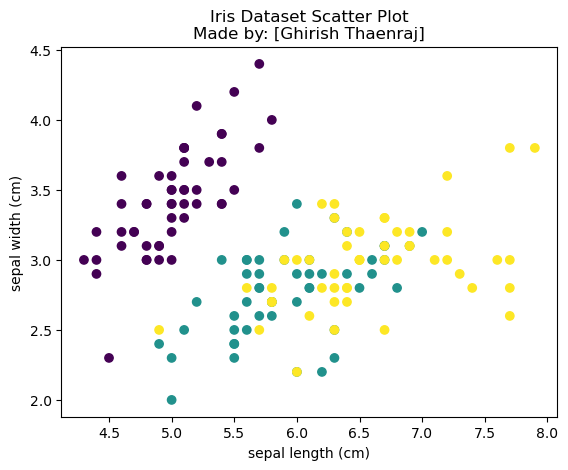

In [5]:
# load the data
iris = datasets.load_iris()
data = iris.data
xs = data[:, 0]
ys = data[:, 1]

# [TODO] plot iris data here
plt.scatter(xs, ys, c=iris.target)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Iris Dataset Scatter Plot\nMade by: [Ghirish Thaenraj]")
plt.show()

We will use a similar process for `graph_series_data`.

1.  call `plt.plot(x, y, format)`, giving it the following arguments:

    -  the `x` argument will be `xs`

    -  the `y` argument will be `y1s`

    -  the `format` argument will be `'.r'`

2.  call `plt.plot(x, y, format)` again, giving it the following
    arguments:

    -  the `x` argument will be `xs`

    -  the `y` argument will be `y2s`

    -  the `format` argument will be `'-b'`

3.  Add a title to the plot of the form "Made by: \[your name\]".

4.  Use pyplot commands to add a legend to the series data plot, where each series is labeled with its function. Look [<u>here</u>](https://matplotlib.org/users/legend_guide.html) to start!

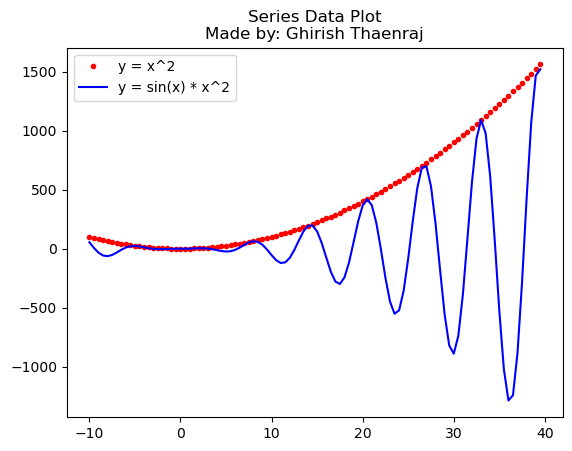

In [7]:
xs = np.arange(100) * .5 - 10  # Creates a list of 100 values in intervals of .5, starting at -10.
# Numpy makes it very easy (and efficient) to do elementwise operations on large datasets.
y1s = [x*x for x in xs]  # If you are unfamiliar, this is called Python's "List Comprehension Syntax"
y2s = [math.sin(x)*x*x for x in xs]

# https://matplotlib.org/users/pyplot_tutorial.html is a good starting point for more info.
# [TODO] plot series data here
plt.plot(xs, y1s, '.r', label="y = x^2")
plt.plot(xs, y2s, '-b', label="y = sin(x) * x^2")
plt.title("Series Data Plot\nMade by: Ghirish Thaenraj")
plt.legend()
plt.show()


#### Part 2: Numpy (7 points)

Answer the following questions using numpy functions. Note that when importing numpy, it is often abbreviated to np (i.e., `import numpy as np`), so when calling numpy functions, you can use np.\[function\]. Further, note that you may NOT use the np array constructor to solve these questions (i.e., `np.array(...)`). Some functions you may want to consider to approach this problem are `np.arange`, `np.zeros`, `np.ones`, `np.eye`, `np.sum`, `np.hstack`, `np.vstack`, `np.transpose`, `np.matmul`, `np.inner`, `np.where` and `np.dot`.

-  Using numpy, how would you create a 1D array containing the values 2
    through 6 inclusive?

In [10]:
# Solution:
arr = np.arange(2,7)
print(arr)

[2 3 4 5 6]


-  Using numpy, how would you create a 4x4 matrix where all the values
    are 1?

In [12]:
# Solution:
arr = np.ones((4,4))
print(arr)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


-  Using numpy, how would you create a 6x6 identity matrix?

In [13]:
# Solution:
arr = np.eye(6)
print(arr)

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]


-  Using numpy, how would you sum the values of each column of matrix
    A?

In [15]:
# Solution:
A = np.ones((4,4))
col_sum = np.sum(A, axis = 1)
print(col_sum)

[4. 4. 4. 4.]


-  Using numpy, given the matrices `A` and `B`, how would you find the
    matrix `C`, where `C` = `A`<sup>*T*</sup>`B`?

In [18]:
# Solution:
A = B = np.ones((4,4))

C = np.matmul(A.T,B)
print(C)


[[4. 4. 4. 4.]
 [4. 4. 4. 4.]
 [4. 4. 4. 4.]
 [4. 4. 4. 4.]]


-  Using numpy, using either np.vstack or np.hstack, how would you
    create a 4x2 matrix where all the values in the first column are 0’s
    and all the values in the second column are 1’s?

In [20]:
# Solution:
col_zero = np.zeros((4,1))
col_one  = np.ones((4,1))

res = np.hstack((col_zero, col_one))
print(res)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


-  Given a matrix of floats A, using numpy, how would you return an
    array of the same shape, where all values \> 3.0 are set to 1, and
    the rest to 0?

In [22]:
# Solution:
res = np.where(A > 3.0, 1, 0)
print(res)

[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
